1. Clone NextFace and set the correct path on google drive
2. enable gpu from Menu->Runtime-> Change runtime type

In [ ]:
!git clone https://github.com/abdallahdib/NextFace.git
import sys
import os
sys.path.insert(0,'/content/NextFace') #verify ur path

2. install dependencies

In [ ]:
pip install face_alignment==1.2.0 redner-gpu

3. create optimizer and set the correct path to the **'baselMorphableModel'** directory 

PS: u have to manually upload the file **'morphableModel-2017.pickle'** from your local pc to google drive or download the **'model2017-1_face12_nomouth.h5'** from https://faces.dmi.unibas.ch/bfm/bfm2017.html and **albedoModel2020_face12_albedoPart.h5** from https://github.com/waps101/AlbedoMM/releases/download/v1.0/albedoModel2020_face12_albedoPart.h5. put these two files inside the **'baselMorphableModel'** directory

The reason for not adding these files directly because we are not allowed to share these files and u have to manually agree with their license term before using these data. so yeh! unfortunately u will have to manually download them (please refer to readme file in the github repository)

In [ ]:

from optimizer import Optimizer
from config import Config
config = Config()
config.fillFromDicFile('/content/NextFace/optimConfig.ini')
config.device = 'cuda'
config.path = '/content/NextFace/baselMorphableModel/' #verify ur path


In [ ]:
imagePath = '/content/NextFace/input/s1.png' #verify ur path
outputDir = './content/outputOptim/' + os.path.basename(imagePath.strip('/'))
optimizer = Optimizer(outputDir ,config)

now we can run the optimization

loading image from path:  /content/NextFace/input/s1.png
detecting landmarks...


/content/NextFace/landmarks.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  return torch.tensor(landmarks, device = self.device)
init camera pose...
1/3 => Optimizing head pose and expressions using landmarks...
100%|██████████| 2000/2000 [00:07<00:00, 252.01it/s]
2/3 => Optimizing shape, statistical albedos, expression, head pose and scene light...
100%|██████████| 401/401 [04:00<00:00,  1.67it/s]
3/3 => finetuning albedos, shape, expression, head pose and scene light...
100%|██████████| 101/101 [01:01<00:00,  1.63it/s]
took 5.18 minutes to optimize
saving to: ' ./content/outputOptim/s1.png/ '. hold on... 


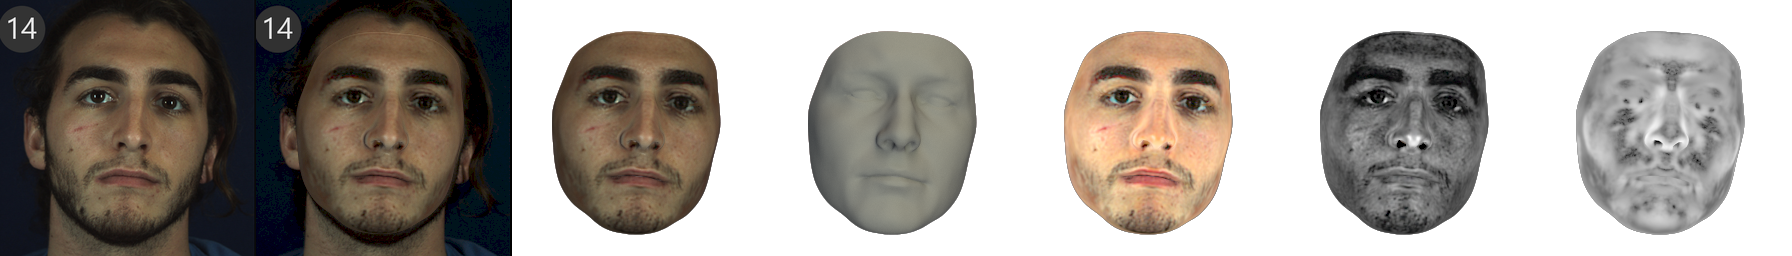

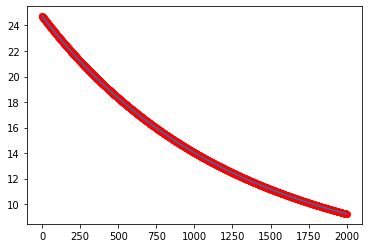

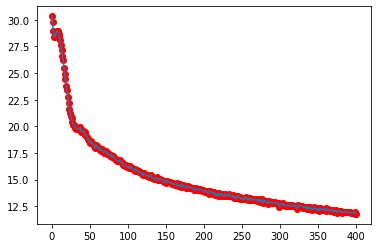

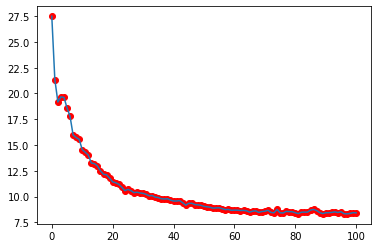

In [5]:
#run the optimization now 
optimizer.run(imagePath)
#display results
from IPython.display import Image, display
from IPython.display import Image
display(Image(outputDir + '/render_0.png'))
